In [ ]:
import pandas as pd 
from sklearn import preprocessing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('always')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/IDS/gender-prediction.csv')
df

In [ ]:
labels = preprocessing.LabelEncoder()

beard_encoded = labels.fit_transform(df['beard'])
hair_length_encoded = labels.fit_transform(df['hair_length'])
scarf_encoded = labels.fit_transform(df['scarf'])
eye_color_encoded = labels.fit_transform(df['eye_color'])

x_encoded = list(zip(df['height'], df['weight'], beard_encoded, hair_length_encoded, df['shoe_size'], scarf_encoded, eye_color_encoded))

In [ ]:
y = df['gender']
y_encoded = labels.fit_transform(y)

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.33, random_state = 1)

In [ ]:
random_forest_model = RandomForestClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()

In [ ]:
random_forest_model.fit(X_train,Y_train)
svc_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)

In [ ]:
random_forest_prediction = random_forest_model.predict(x_test)
svc_prediction = svc_model.predict(x_test)
mlp_prediction = mlp_model.predict(x_test)

In [ ]:
random_forest_model_acc = accuracy_score(y_test, random_forest_prediction)*100
svc_model_acc = accuracy_score(y_test, svc_prediction)*100
mlp_model_acc = accuracy_score(y_test, mlp_prediction)*100
print("Random forest accuracy", random_forest_model_acc, "%")
print("Support Vector Machine accuracy", svc_model_acc, "%")
print("Multilayer Perceptron accuracy", mlp_model_acc, "%")

In [ ]:
#using train/test split ratio of 80/20
X_train, x_test, Y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.2, random_state = 3)

In [ ]:
random_forest_model = RandomForestClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()

In [ ]:
random_forest_model.fit(X_train,Y_train)
svc_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)

In [ ]:
random_forest_prediction = random_forest_model.predict(x_test)
svc_prediction = svc_model.predict(x_test)
mlp_prediction = mlp_model.predict(x_test)

In [ ]:
random_forest_model_acc = accuracy_score(y_test, random_forest_prediction)*100
svc_model_acc = accuracy_score(y_test, svc_prediction)*100
mlp_model_acc = accuracy_score(y_test, mlp_prediction)*100
print("Random forest accuracy", random_forest_model_acc, "%")
print("Support Vector Machine accuracy", svc_model_acc, "%")
print("Multilayer Perceptron accuracy", mlp_model_acc, "%")

In [ ]:
# 2 believed most powerful attributes are Beard and scarf
#remvoing these two attributes
x_encoded = list(zip(df['height'], df['weight'], hair_length_encoded, df['shoe_size'], eye_color_encoded))
y = df['gender']
y_encoded = labels.fit_transform(y)

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.2, random_state = 1)

In [ ]:
random_forest_model = RandomForestClassifier()
svc_model = SVC()
mlp_model = MLPClassifier()

In [ ]:
random_forest_model.fit(X_train,Y_train)
svc_model.fit(X_train,Y_train)
mlp_model.fit(X_train,Y_train)

In [ ]:
random_forest_prediction = random_forest_model.predict(x_test)
svc_prediction = svc_model.predict(x_test)
mlp_prediction = mlp_model.predict(x_test)

In [ ]:
random_forest_model_acc = accuracy_score(y_test, random_forest_prediction)*100
svc_model_acc = accuracy_score(y_test, svc_prediction)*100
mlp_model_acc = accuracy_score(y_test, mlp_prediction)*100
print("Random forest accuracy", random_forest_model_acc, "%")
print("Support Vector Machine accuracy", svc_model_acc, "%")
print("Multilayer Perceptron accuracy", mlp_model_acc, "%")

Random forest accuracy 100.0 %
Support Vector Machine accuracy 87.5 %
Multilayer Perceptron accuracy 50.0 %


In [ ]:
x_encoded = list(zip(df['height'], df['weight'], beard_encoded, hair_length_encoded, df['shoe_size'], scarf_encoded, eye_color_encoded))
y = df['gender']
y_encoded = labels.fit_transform(y)

In [ ]:
#Monte Carlo cross-validation
monte_carlo = ShuffleSplit(n_splits=5,test_size=0.33,random_state=3)

In [ ]:
decision_tree_model = DecisionTreeClassifier()

In [ ]:
monte_carlo_acc = cross_val_score(decision_tree_model,x_encoded,y_encoded,cv=monte_carlo).mean() * 100
monte_carlo_f1 = cross_val_score(decision_tree_model,x_encoded,y_encoded, scoring="f1", cv=monte_carlo).mean() * 100
print("Monte Carlo cross-validation accuracy", monte_carlo_acc, "%")
print("Monte Carlo cross-validation F1 score", monte_carlo_f1, "%")

In [ ]:
#Leave P-Out cross-validation
lpo = LeavePOut(2)
lpo.get_n_splits(x_encoded)

In [ ]:
decision_tree_model = DecisionTreeClassifier()

In [ ]:
leave_pout_acc = cross_val_score(decision_tree_model,x_encoded,y_encoded,cv=lpo).mean() *100
leave_pout_f1 = cross_val_score(decision_tree_model,x_encoded,y_encoded,cv=lpo, scoring="f1_weighted").mean() * 100
print("Leave P-Out cross-validation accuracy", leave_pout_acc, "%")
print("Leave P-Out cross-validation F1 score", leave_pout_f1, "%")

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/IDS/gender-prediction-2.csv')
df2

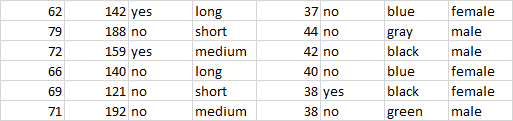

In [ ]:
train_data = df2.iloc[:80]
train_data
test_data = df2.iloc[80:]
test_data

In [ ]:
labels = preprocessing.LabelEncoder()

train_beard_encoded = labels.fit_transform(train_data['beard'])
train_hair_length_encoded = labels.fit_transform(train_data['hair_length'])
train_scarf_encoded = labels.fit_transform(train_data['scarf'])
train_eye_color_encoded = labels.fit_transform(train_data['eye_color'])

In [ ]:
X_train = list(zip(train_data['height'], train_data['weight'], train_beard_encoded, train_hair_length_encoded, train_data['shoe_size'], train_scarf_encoded, train_eye_color_encoded))
Y_train = train_data['gender']

In [ ]:
test_beard_encoded = labels.fit_transform(test_data['beard'])
test_hair_length_encoded = labels.fit_transform(test_data['hair_length'])
test_scarf_encoded = labels.fit_transform(test_data['scarf'])
test_eye_color_encoded = labels.fit_transform(test_data['eye_color'])

In [ ]:
x_test = list(zip(test_data['height'], test_data['weight'], test_beard_encoded, test_hair_length_encoded, test_data['shoe_size'], test_scarf_encoded, test_eye_color_encoded))
y_test = test_data['gender']

In [ ]:
gnb_model = GaussianNB()

In [ ]:
gnb_model.fit(X_train,Y_train)

GaussianNB()

In [ ]:
prediction = gnb_model.predict(x_test)

In [ ]:
model_acc = accuracy_score(y_test, prediction)*100
model_precision = precision_score(y_test, prediction, average=None).mean() *100
model_recall = recall_score(y_test, prediction, average=None).mean() *100
print("Gaussian Naive Bayes accuracy = ", model_acc, "%")
print("Gaussian Naive Bayes precision = ", model_precision, "%")
print("Gaussian Naive Bayes recall = ", model_recall, "%")

Gaussian Naive Bayes accuracy =  80.0 %
Gaussian Naive Bayes precision =  87.5 %
Gaussian Naive Bayes recall =  75.0 %
